In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\pc\\Desktop\\jupyter_notebook\\redand white wine.csv')

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.shape

(1599, 12)

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


<AxesSubplot:xlabel='quality', ylabel='count'>

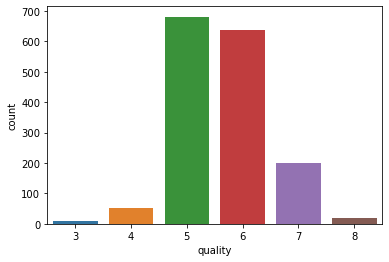

In [9]:
sns.countplot(df['quality'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# check the outliers

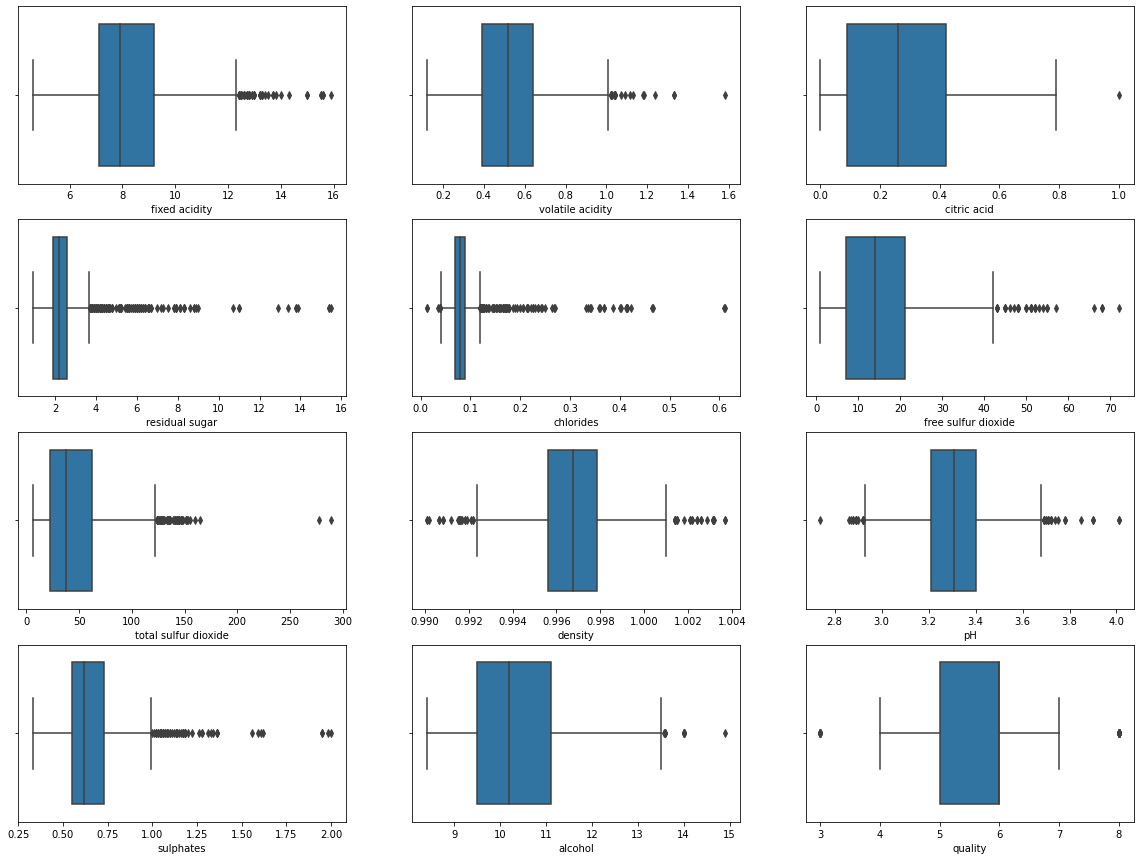

In [11]:
plt.figure(figsize=(20,15))
graph = 1
for column in df:
    if graph<=12:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(df[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [12]:
from scipy.stats import zscore

In [14]:
z = np.abs(zscore(df))

In [15]:
print(z.shape)

(1599, 12)


In [16]:
threshold=3

In [17]:
print(np.where(z>3))

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
         45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
        106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
        151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
        244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
        354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
        459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
        555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
        639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
        690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
        821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
        982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
       1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
       1244, 1244, 1260, 1269, 1269, 1270, 1270, 1

In [18]:
data = df[(z<3).all(axis=1)]
print(df.shape)
print(data.shape)

(1599, 12)
(1451, 12)


In [19]:
loss_data = (1599-1451)/(1451)

In [20]:
loss_data

0.1019986216402481

In [21]:
0.10199*100

10.199

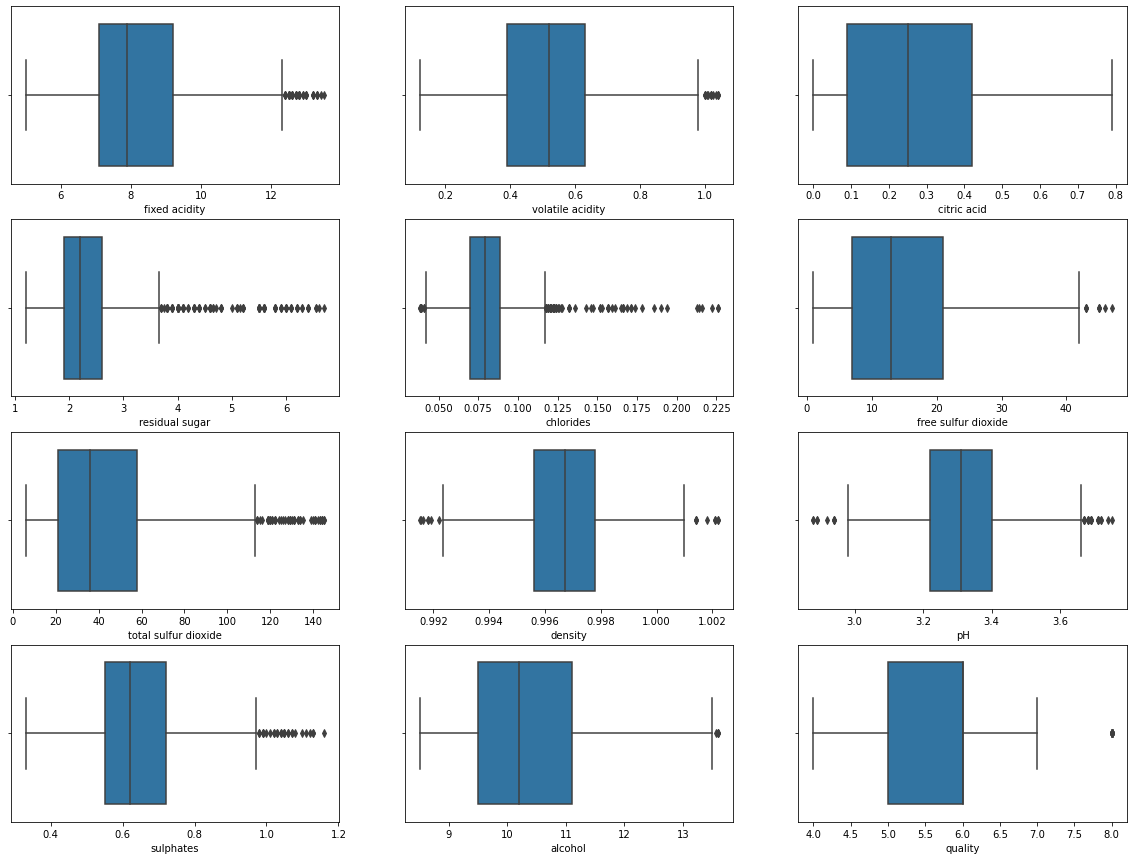

In [22]:
plt.figure(figsize=(20,15))
graph = 1
for column in data:
    if graph<=12:
        ax = plt.subplot(4,3,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

# check skewness

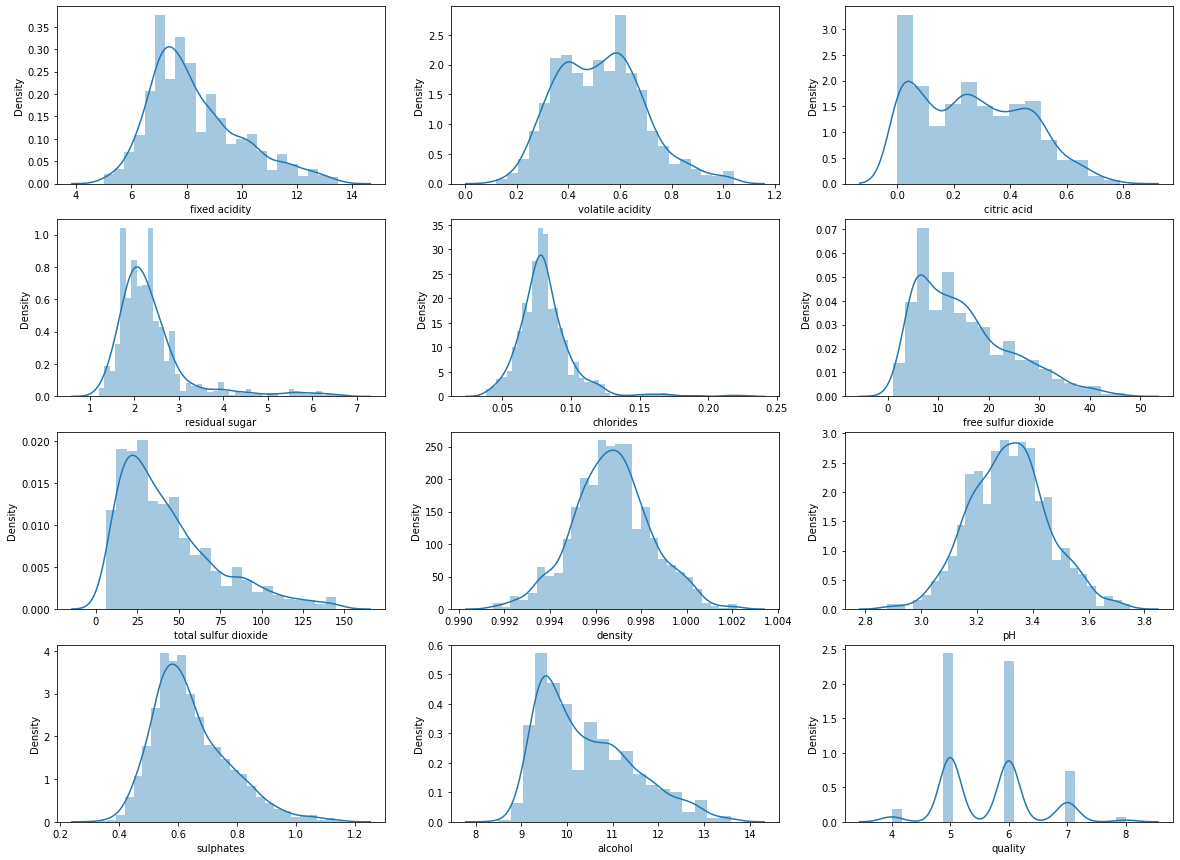

In [23]:
plt.figure(figsize=(20,15))
graph = 1
for column in data:
    if graph<=12:
        ax = plt.subplot(4,3,graph)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
        
        
        
        graph+=1
plt.show()

In [24]:
data.skew()

fixed acidity           0.823934
volatile acidity        0.380659
citric acid             0.291297
residual sugar          2.456107
chlorides               2.275162
free sulfur dioxide     0.869250
total sulfur dioxide    1.183161
density                 0.055738
pH                      0.114705
sulphates               0.891492
alcohol                 0.758958
quality                 0.407865
dtype: float64

In [25]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [26]:
x = data.drop(['quality'],axis=1)
y = data['quality']

In [27]:
from sklearn.preprocessing import PowerTransformer

In [29]:
power = PowerTransformer(method='yeo-johnson', standardize=True)
data_trans = power.fit_transform(x)

In [31]:
transform_x_data = pd.DataFrame(data_trans,columns=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'])

In [60]:
transform_x_data.corr()

,volatile acidity,citric acid,residual sugar,chlorides,total sulfur dioxide,pH,sulphates,alcohol
volatile acidity,1.000000,-0.610171,0.037991,0.097987,0.117496,0.245951,-0.357814,-0.221887
citric acid,-0.610171,1.000000,0.184147,0.094828,-0.006921,-0.522187,0.303844,0.147105
residual sugar,0.037991,0.184147,1.000000,0.229875,0.135625,-0.073452,0.069916,0.147930
chlorides,0.097987,0.094828,0.229875,1.000000,0.103345,-0.206196,-0.010688,-0.263831
total sulfur dioxide,0.117496,-0.006921,0.135625,0.103345,1.000000,0.034076,0.002872,-0.275374
pH,0.245951,-0.522187,-0.073452,-0.206196,0.034076,1.000000,-0.017772,0.137147
sulphates,-0.357814,0.303844,0.069916,-0.010688,0.002872,-0.017772,1.000000,0.268353
alcohol,-0.221887,0.147105,0.147930,-0.263831,-0.275374,0.137147,0.268353,1.000000


<AxesSubplot:>

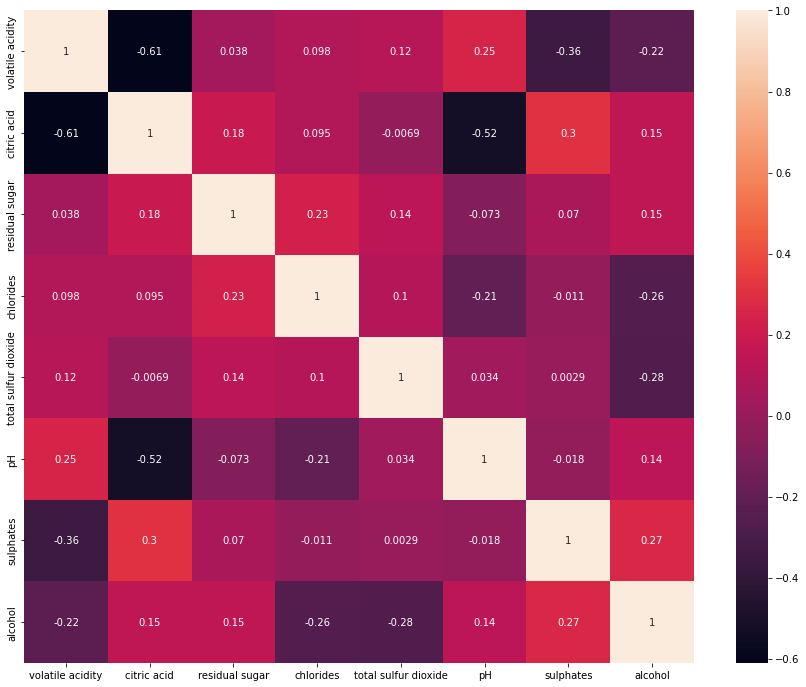

In [61]:
plt.figure(figsize=(15,12))
sns.heatmap(transform_x_data.corr(),annot=True)

# normalization

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
ms = MinMaxScaler()

In [64]:
x_scaled = ms.fit_transform(transform_x_data)

In [65]:
x_scaled.shape[1]

8

In [66]:
vif = pd.DataFrame()

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [68]:
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

In [70]:
vif['features'] = transform_x_data.columns

In [71]:
vif

,vif,features
0,12.091249,volatile acidity
1,6.104133,citric acid
2,14.160556,residual sugar
3,13.592338,chlorides
4,7.684884,total sulfur dioxide
5,14.247902,pH
6,17.418141,sulphates
7,12.229831,alcohol


In [59]:
transform_x_data.drop(['fixed acidity','density','free sulfur dioxide'],axis=1,inplace=True)

# model selection

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [73]:
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=.30, random_state=i)
    mod = LogisticRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum accuracy score is ",maxAccu," on Random_state ",maxRS)

Maximum accuracy score is  0.6444954128440367  on Random_state  3


In [75]:
confusion_mat = confusion_matrix(y_test,pred)

In [76]:
confusion_mat

array([[  0,  11,   5,   1,   0],
       [  0, 128,  58,   1,   0],
       [  0,  60, 110,   6,   0],
       [  0,   0,  43,   9,   0],
       [  0,   0,   3,   1,   0]], dtype=int64)

In [77]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.64      0.68      0.66       187
           6       0.50      0.62      0.56       176
           7       0.50      0.17      0.26        52
           8       0.00      0.00      0.00         4

    accuracy                           0.57       436
   macro avg       0.33      0.30      0.30       436
weighted avg       0.54      0.57      0.54       436



# decision tree model

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

57.56880733944955
[[  2  10   3   2   0]
 [  5 120  52   9   1]
 [  3  50 106  16   1]
 [  1   2  24  23   2]
 [  0   0   2   2   0]]
              precision    recall  f1-score   support

           4       0.18      0.12      0.14        17
           5       0.66      0.64      0.65       187
           6       0.57      0.60      0.58       176
           7       0.44      0.44      0.44        52
           8       0.00      0.00      0.00         4

    accuracy                           0.58       436
   macro avg       0.37      0.36      0.36       436
weighted avg       0.57      0.58      0.57       436



# RandomForestClassifier¶

In [79]:
from sklearn.ensemble import RandomForestClassifier
rr = RandomForestClassifier()
rr.fit(x_train,y_train)
pred = rr.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

68.11926605504587
[[  0  14   2   1   0]
 [  0 145  38   4   0]
 [  0  45 122   9   0]
 [  0   0  22  30   0]
 [  0   0   2   2   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.71      0.78      0.74       187
           6       0.66      0.69      0.67       176
           7       0.65      0.58      0.61        52
           8       0.00      0.00      0.00         4

    accuracy                           0.68       436
   macro avg       0.40      0.41      0.41       436
weighted avg       0.65      0.68      0.66       436



# support vector classifier

In [80]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
pred = svc.predict(x_test)
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


60.77981651376147
[[  0  13   3   1   0]
 [  0 134  49   4   0]
 [  0  57 109  10   0]
 [  0   1  29  22   0]
 [  0   0   2   2   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        17
           5       0.65      0.72      0.68       187
           6       0.57      0.62      0.59       176
           7       0.56      0.42      0.48        52
           8       0.00      0.00      0.00         4

    accuracy                           0.61       436
   macro avg       0.36      0.35      0.35       436
weighted avg       0.58      0.61      0.59       436



# knn

In [81]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
print(accuracy_score(y_test,y_pred)*100)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

58.256880733944946
[[  1  10   4   2   0]
 [  5 122  51   9   0]
 [  2  57 103  14   0]
 [  0   5  19  28   0]
 [  0   1   2   1   0]]
              precision    recall  f1-score   support

           4       0.12      0.06      0.08        17
           5       0.63      0.65      0.64       187
           6       0.58      0.59      0.58       176
           7       0.52      0.54      0.53        52
           8       0.00      0.00      0.00         4

    accuracy                           0.58       436
   macro avg       0.37      0.37      0.37       436
weighted avg       0.57      0.58      0.57       436



# bagging

In [82]:
from sklearn.ensemble import BaggingClassifier

In [83]:
bagg_rf = BaggingClassifier(base_estimator=RandomForestClassifier(),n_estimators=9,max_samples=0.8,bootstrap=True,random_state=63,oob_score=True)

In [84]:
bagg_rf.fit(x_train,y_train)

BaggingClassifier(base_estimator=RandomForestClassifier(), max_samples=0.8,
                  n_estimators=9, oob_score=True, random_state=63)

In [85]:
bagg_rf.score(x_train,y_train)

0.948768472906404

In [86]:
bagg_rf.score(x_test,y_test)

0.6605504587155964

In [87]:
bagg_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=0.7,bootstrap=True,random_state=63,oob_score=True)

In [88]:
bagg_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_samples=0.7,
                  n_estimators=9, oob_score=True, random_state=63)

In [89]:
bagg_knn.score(x_test,y_test)

0.5527522935779816

In [90]:
bagg_knn.score(x_train,y_train)

0.6975369458128079

# hyper tunnig

In [91]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

In [92]:
parameters = {'criterion':{"gini", "entropy"},
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':int,
             'max_depth':int}

In [95]:
from sklearn.model_selection import KFold ,cross_val_score


In [96]:
RandomForest = RandomForestClassifier(criterion = 'gini', max_features = 'log2')
RandomForest.fit(x_train,y_train)
RandomForest.score(x_train,y_train)

pred_decision = RandomForest.predict(x_test)
RandomForestS = accuracy_score(y_test,pred_decision)
print('accuracy Score:', RandomForestS*100)

RandomForestScore = cross_val_score(RandomForest,x,y,cv = 5)
RandomForestC = RandomForestScore.mean()
print("Cross Val Score:",RandomForestC*100)

accuracy Score: 66.28440366972477
Cross Val Score: 58.51522692262117


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import plot_roc_curve

In [98]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [99]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
svc.fit(x_train,y_train)
print('model trained')

model trained


In [100]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
svc.score(x_test,y_test)
print('model tested')

model tested


In [105]:
y_test

1554    6
329     5
176     5
696     6
525     5
       ..
1361    5
53      5
23      5
809     6
1448    5
Name: quality, Length: 436, dtype: int64

In [107]:
pred = pd.Series(y_pred)

In [114]:
pred[1:15]

1     6
2     5
3     6
4     5
5     5
6     6
7     5
8     6
9     5
10    5
11    6
12    6
13    5
14    6
dtype: int64

In [116]:
df.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5
